# Market Risk Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Market+Risk+Dataset.csv")

In [4]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

## Returns

In [7]:
returns = pd.DataFrame()
w_o_date = list(df.columns)
w_o_date.remove('Date')
for i in w_o_date:
    returns[i] = (df[i].diff(1)*100/df[i]).round(2)

In [8]:
returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.72,-1.47,0.66,4.71,2.86,3.23,9.02,-6.81,1.19,8.25
2,-1.18,0.00,-0.88,-2.22,-2.94,-1.40,-0.49,0.00,-1.20,-8.21
3,-0.40,0.00,6.97,4.59,0.00,0.76,-0.50,-1.82,0.00,0.71
4,1.17,-4.62,-1.24,-0.35,-7.94,-1.97,1.15,-15.13,-5.06,-16.05


In [9]:
returns.dropna(inplace=True)

In [10]:
returns.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.217476,-0.084633,-0.233003,0.010575,-0.539585,0.288147,-0.247540,-0.696262,-1.623642,-1.450863
std,3.536123,4.771920,4.167071,4.703862,6.218274,3.976485,4.567688,7.602355,11.174078,10.229930
min,-18.210000,-26.670000,-33.020000,-32.940000,-28.570000,-13.790000,-19.700000,-32.810000,-100.000000,-58.180000
25%,-1.460000,-2.380000,-2.110000,-2.270000,-4.170000,-1.970000,-2.090000,-5.100000,-4.620000,-5.410000
50%,0.440000,0.000000,0.150000,0.160000,0.000000,0.320000,0.150000,0.000000,0.000000,-0.580000
75%,2.430000,2.750000,1.970000,2.810000,3.230000,2.940000,2.300000,3.650000,2.410000,3.570000
max,12.690000,18.070000,8.550000,11.970000,26.580000,14.130000,15.350000,21.650000,50.000000,25.940000


In [11]:
avg_std = pd.DataFrame({'Stock_Mean': df.mean().values, 'Stock_std': df.drop('Date',axis=1).std()})

In [12]:
avg_std['Coef_of_variation'] = avg_std['Stock_Mean']/avg_std['Stock_std']

In [13]:
avg_std

,Stock_Mean,Stock_std,Coef_of_variation
Infosys,511.340764,135.952051,3.761185
Indian Hotel,114.560510,22.509732,5.089377
Mahindra & Mahindra,636.678344,102.879975,6.188555
Axis Bank,540.742038,115.835569,4.668187
SAIL,59.095541,15.810493,3.737742
Shree Cement,14806.410828,4288.275085,3.452766
Sun Pharma,633.468153,171.855893,3.686043
Jindal Steel,147.627389,65.879195,2.240880
Idea Vodafone,53.713376,31.248985,1.718884
Jet Airways,372.659236,202.262668,1.842452


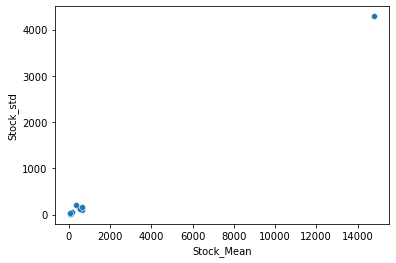

In [14]:
sns.scatterplot(x='Stock_Mean',y='Stock_std',data=avg_std)
X=avg_std['Stock_Mean']
y = avg_std['Stock_std']


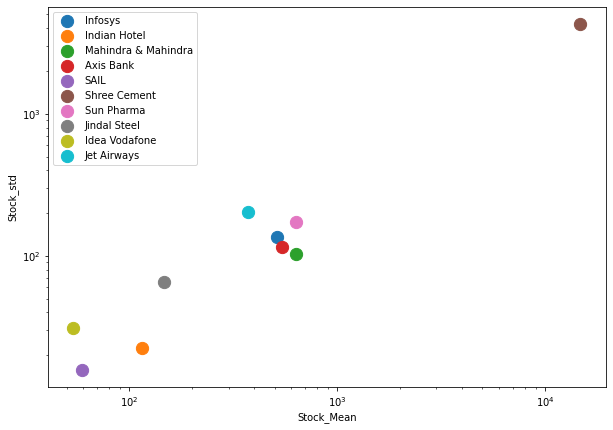

In [45]:
plt.figure(figsize=[10,7])
for i in range(avg_std.shape[0]):
    plt.scatter(x=avg_std['Stock_Mean'][i],y=avg_std['Stock_std'][i],s=150)
plt.legend(list(avg_std.index))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stock_Mean');
plt.ylabel('Stock_std');

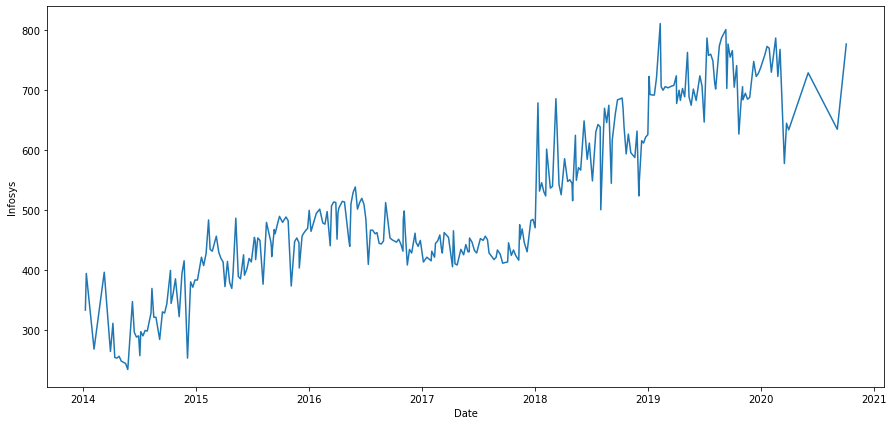

In [16]:
plt.figure(figsize=[15,7])
sns.lineplot(x='Date',y='Infosys',data=df);

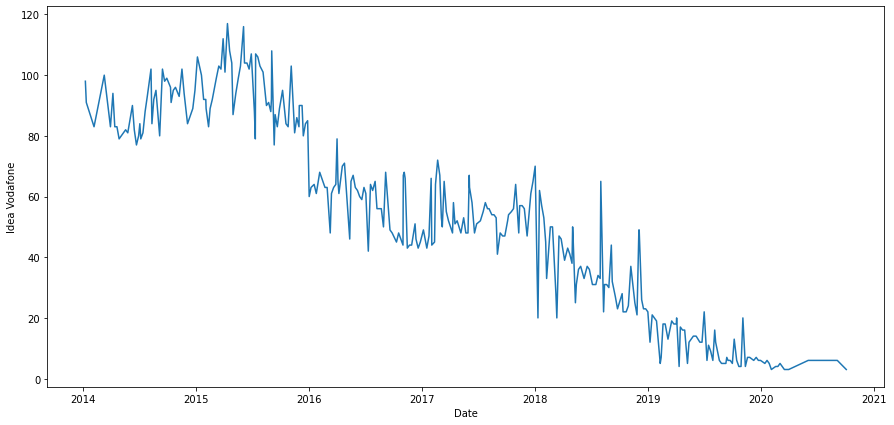

In [17]:
plt.figure(figsize=[15,7])
sns.lineplot(x='Date',y='Idea Vodafone',data=df);